In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\loan_dataset.csv')

In [3]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
data.shape

(116058, 29)

In [5]:
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [6]:
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [7]:
data1=data.drop(['loan_id','financial_institution','source','origination_date','first_payment_date','loan_purpose'],axis=1)

In [8]:
data1.dtypes

interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                           int64
dtype: object

In [9]:
y=data1["m13"]
X=data1.drop('m13',axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)
y_pred_logi = logistic_model.predict(X_test)

In [14]:
y_pred_logi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
print("Confusion matrix is:\n",confusion_matrix(y_test,y_pred_logi))

Confusion matrix is:
 [[23072    12]
 [  128     0]]


In [17]:
print("Accuracy score is:\n",accuracy_score(y_test,y_pred_logi))

Accuracy score is:
 0.9939686369119421


In [18]:
from sklearn.metrics import precision_score,recall_score
print("Recall score is:\n",recall_score(y_test,y_pred_logi))

Recall score is:
 0.0


# SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_clf=SVC(kernel="rbf")
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [22]:
print("Confusion matrix is:\n",confusion_matrix(y_test,y_pred_svm))

Confusion matrix is:
 [[23084     0]
 [  128     0]]


In [23]:
print("Accuracy score is:\n",accuracy_score(y_test,y_pred_svm))

Accuracy score is:
 0.9944856108909185


In [24]:
print("Recall score is:\n",recall_score(y_test,y_pred_svm))

Recall score is:
 0.0


# kNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [27]:
metric_k

[0.993839393417198,
 0.9943563673961744,
 0.9942271239014303,
 0.9944856108909185,
 0.9944425297260038,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185]

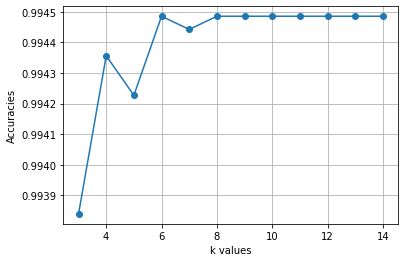

In [28]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [29]:
#Same steps above with k=6
classifier=KNeighborsClassifier(n_neighbors=6)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [30]:
#print accuracy score
accuracy_score(y_test,y_pred_kNN)

0.9944856108909185

In [31]:
#print confusion matrix
confusion_matrix(y_test,y_pred_kNN)

array([[23084,     0],
       [  128,     0]], dtype=int64)

In [32]:
#print precision score
precision_score(y_test,y_pred_kNN)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

# Decision Tree model

In [33]:
#import library
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [35]:
#print confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[23006,    78],
       [   83,    45]], dtype=int64)

In [36]:
#print accuracy score
accuracy_score(y_test,y_pred_dt)

0.9930639324487334

# Random Forest

In [37]:
#import library
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [39]:
#print confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[23067,    17],
       [   82,    46]], dtype=int64)

In [40]:
#print accuracy score
accuracy_score(y_test,y_pred_rf)

0.9957349646734448

# Standard Scaling

In [98]:
data1.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [99]:
data1.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [100]:
data1.dtypes

interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                           int64
dtype: object

In [101]:
# split to feature and target
X = data1.drop('m13',axis=1)
y = data1['m13']

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
# Standard Scaling
std_sclr = StandardScaler()

In [104]:
X=std_sclr.fit_transform(X)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Logistic Regression

In [106]:
log_reg = LogisticRegression()
log_reg_model1 = log_reg.fit(X_train, y_train)
log_pred1 = log_reg_model1.predict(X_test)

In [107]:
#finding confusion matrix
confusion_matrix(y_test,log_pred1)

array([[23081,     3],
       [   87,    41]], dtype=int64)

In [108]:
#finding accuracy score
accuracy_score(y_test,log_pred1)

0.996122695157677

# kNN 

In [110]:
#Same steps above with k=6
classifier=KNeighborsClassifier(n_neighbors=6)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [111]:
#print accuracy score
accuracy_score(y_test,y_pred_kNN)

0.9957349646734448

In [112]:
#print confusion matrix
confusion_matrix(y_test,y_pred_kNN)

array([[23074,    10],
       [   89,    39]], dtype=int64)

# SVM

In [113]:
svm_clf1=SVC(kernel="rbf")
svm_clf_model=svm_clf1.fit(X_train,y_train)
y_pred_svm1=svm_clf_model.predict(X_test)

In [115]:
print("Confusion matrix is:\n",confusion_matrix(y_test,y_pred_svm1))

Confusion matrix is:
 [[23079     5]
 [  114    14]]


In [114]:
print("Accuracy score is:\n",accuracy_score(y_test,y_pred_svm1))

Accuracy score is:
 0.9948733413751508


Logistic regression model with standard scaling gets maximum accuracy. So it is the best model